In [ ]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import sys
import cv2
import tensorflow as tf
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-m", "--model", required=True,
#	help="path to trained human activity recognition model")
#ap.add_argument("-c", "--classes", required=True,
#	help="path to class labels file")
#ap.add_argument("-i", "--input", type=str, default="",
#	help="optional path to video file")
#args = vars(ap.parse_args())

In [ ]:
# load the contents of the class labels file, then define the sample
# duration (i.e., # of frames for classification) and sample size
# (i.e., the spatial dimensions of the frame)
CLASSES = open("/content/drive/My Drive/human-activity-recognition/action_recognition_kinetics.txt").read().strip().split("\n")
SAMPLE_DURATION = 16
SAMPLE_SIZE = 112

In [ ]:
# load the human activity recognition model
print("[INFO] loading human activity recognition model...")
net = cv2.dnn.readNet("/content/drive/My Drive/human-activity-recognition/resnet-34_kinetics.onnx")
# grab a pointer to the input video stream
print("[INFO] accessing video stream...")
#vs = cv2.VideoCapture("/content/drive/My Drive/human-activity-recognition/example_activities.mp4")
vs = cv2.VideoCapture("/content/drive/My Drive/human-activity-recognition/kick.mkv")

[INFO] loading human activity recognition model...
[INFO] accessing video stream...


In [ ]:
from collections import deque
frames = deque()
new_frames=deque()

In [ ]:
with tf.device(tf.test.gpu_device_name()):
	# loop over frames from the video stream
	while True:
		# read a frame from the video stream
		(grabbed, frame) = vs.read()
		# if the frame was not grabbed then we've reached the end of
		# the video stream so break from the loop
		if not grabbed:
			print("[INFO] no frame read from stream - exiting")
			break
		# resize the frame (to ensure faster processing) and add the
		# frame to our queue
		frame = imutils.resize(frame, width=400)
		frames.append(frame)
		# if our queue is not filled to the sample size, continue back to
		# the top of the loop and continue polling/processing frames
		if len(frames) < SAMPLE_DURATION:
			continue



[INFO] no frame read from stream - exiting


In [ ]:
print(len(frames))

15990


In [ ]:
width = int(vs.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vs.get(cv2.CAP_PROP_FRAME_HEIGHT))
length = int(vs.get(cv2.CAP_PROP_FRAME_COUNT))
print(width)
print(height)
print(length)

854
480
15991


In [ ]:
# Find OpenCV version
(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = vs.get(cv2.cv.CV_CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = vs.get(cv2.CAP_PROP_FPS)
    print("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))

vs.release();

Frames per second using video.get(cv2.CAP_PROP_FPS) : 30.0


In [ ]:
# now that our frames array is filled we can construct our blob
def make_video(frames):
  blob = cv2.dnn.blobFromImages(frames, 1.0,
	(SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),
	swapRB=True, crop=True)
  blob = np.transpose(blob, (1, 0, 2, 3))
  blob = np.expand_dims(blob, axis=0)
# pass the blob through the network to obtain our human activity
# recognition predictions
  net.setInput(blob)
  outputs = net.forward()
  label = CLASSES[np.argmax(outputs)]
  for frame in frames:

  # draw the predicted activity on the frame
    cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
    cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	  0.8, (255, 255, 255), 2)
    new_frames.append(frame)

In [ ]:
length=len(frames)
print(length)

15990


In [ ]:
with tf.device(tf.test.gpu_device_name()):
  i=1
  while i<=length:
    fr=deque(maxlen=16)
    for frame in frames:
      fr.append(frame);
      if i % 16 == 0:
        make_video(fr);
        fr.clear();
      i=i+1;
      print(i)
  print("false now")
  if fr:
    make_video(fr)




  
  


Streaming output truncated to the last 5000 lines.
10994
10995
10996
10997
10998
10999
11000
11001
11002
11003
11004
11005
11006
11007
11008
11009
11010
11011
11012
11013
11014
11015
11016
11017
11018
11019
11020
11021
11022
11023
11024
11025
11026
11027
11028
11029
11030
11031
11032
11033
11034
11035
11036
11037
11038
11039
11040
11041
11042
11043
11044
11045
11046
11047
11048
11049
11050
11051
11052
11053
11054
11055
11056
11057
11058
11059
11060
11061
11062
11063
11064
11065
11066
11067
11068
11069
11070
11071
11072
11073
11074
11075
11076
11077
11078
11079
11080
11081
11082
11083
11084
11085
11086
11087
11088
11089
11090
11091
11092
11093
11094
11095
11096
11097
11098
11099
11100
11101
11102
11103
11104
11105
11106
11107
11108
11109
11110
11111
11112
11113
11114
11115
11116
11117
11118
11119
11120
11121
11122
11123
11124
11125
11126
11127
11128
11129
11130
11131
11132
11133
11134
11135
11136
11137
11138
11139
11140
11141
11142
11143
11144
11145
11146
11147
11148
11149
11150
11151
1

In [ ]:
print(len(new_frames))

15990


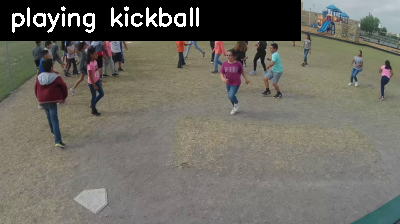

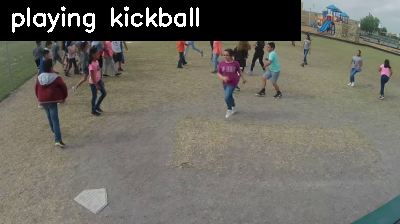

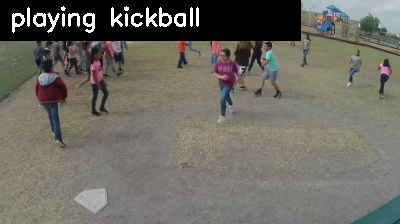

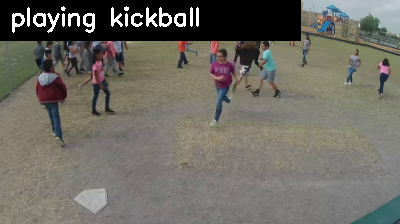

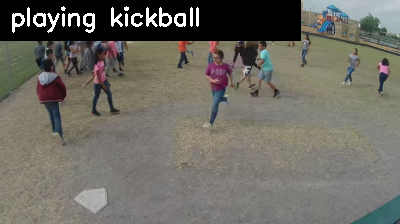

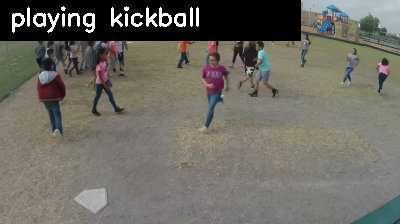

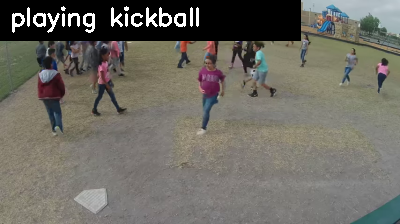

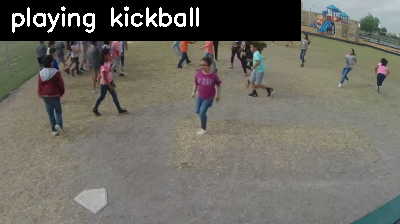

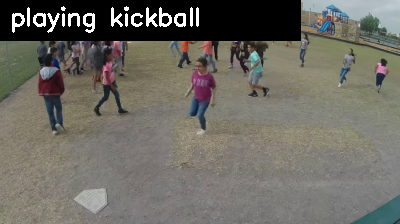

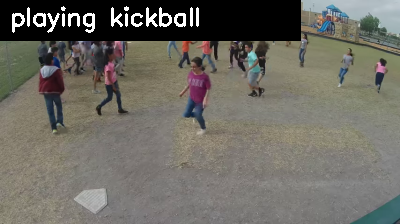

In [ ]:
from google.colab.patches import cv2_imshow
ak=0
for frame in frames:
  ak=ak+1
  cv2_imshow(frame)
  if ak == 10:
    break

In [ ]:
def m_video(outvid, frames=None, fps=30, size=None,
               is_color=True, format="FMP4"):
  from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
  fourcc = VideoWriter_fourcc(*format)
  vid = None
  for frame in frames:
      if vid is None:
          if size is None:
              size = frame.shape[1], frame.shape[0]
          vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
      if size[0] != frame.shape[1] and size[1] != frame.shape[0]:
          frame = resize(frame, size)
      vid.write(frame)
  vid.release()

In [ ]:
m_video("/content/drive/My Drive/human-activity-recognition/outputkick.mp4", new_frames, fps=30)

In [ ]:
%cd drive/MyDrive/data/video-captioning

/content/drive/MyDrive/data/video-captioning


In [ ]:
%cd text_files/

/content/drive/My Drive/data/video-captioning/text_files


In [ ]:
d=eval(open('Vid2Url_Full.txt').read())
video_train = list(d.keys())

In [ ]:
type(d)

dict

In [ ]:
def total_keys(test_dict): 
    return (0 if not isinstance(test_dict, dict)  
    else len(test_dict) + sum(total_keys(val) for val in test_dict.values()))
res = total_keys(d) 
print("Number of keys in dictionary is : " + str(res)) 

Number of keys in dictionary is : 1970


In [ ]:
class S2VT(nn.Module):
    def __init__(self, vocab_size, batch_size=10, frame_dim=4096, hidden=500, dropout=0.5, n_step=80):
        super(S2VT, self).__init__()
        self.batch_size = batch_size
        self.frame_dim = frame_dim
        self.hidden = hidden
        self.n_step = n_step

        self.drop = nn.Dropout(p=dropout)
        self.linear1 = nn.Linear(frame_dim, hidden)
        self.linear2 = nn.Linear(hidden, vocab_size)

        self.lstm1 = nn.LSTM(hidden, hidden, batch_first=True, dropout=dropout)
        self.lstm2 = nn.LSTM(2*hidden, hidden, batch_first=True, dropout=dropout)

        self.embedding = nn.Embedding(vocab_size, hidden)

In [ ]:
def extract_feats(filenames,batch_size):
    model_file = 'VGG_ILSVRC_16_layers.caffemodel'
    deploy_file = 'VGG16_deploy.prototxt'
    net = caffe.Net(deploy_file,model_file,caffe.TEST)
    layer = 'fc7'
    mean_file = 'ilsvrc_2012_mean.npy'
    transformer = caffe.io.Transformer({'data':net.blobs['data'].data.shape})
    transformer.set_mean('data',np.load(mean_file).mean(1).mean(1))
    transformer.set_transpose('data',(2,0,1))
    transformer.set_raw_scale('data',255.0)
    net.blobs['data'].reshape(batch_size,3,224,224)
    print("VGG Network loaded")
    #Read videos and extract features in batches
    for file in filenames:
        vid = imageio.get_reader("Data/YouTubeClips/" + file, 'ffmpeg')
        curr_frames = []
        for frame in vid:
            frame = skimage.transform.resize(frame,[224,224])
            if len(frame.shape)<3:
                frame = np.repeat(frame,3).reshape([224,224,3])
            curr_frames.append(frame)
        curr_frames = np.array(curr_frames)
        print("Shape of frames: {0}".format(curr_frames.shape))
        idx = np.linspace(0,len(curr_frames)-1,80).astype(int)    
        curr_frames = curr_frames[idx,:,:,:]
        print("Captured 80 frames: {0}".format(curr_frames.shape))
        curr_feats = []
        for i in range(0,80,batch_size):
            caffe_in = np.zeros([batch_size,3,224,224])
            curr_batch = curr_frames[i:i+batch_size,:,:,:]
            for j in range(batch_size):
                caffe_in[j] = transformer.preprocess('data',curr_batch[j])
            out = net.forward_all(blobs=[layer],**{'data':caffe_in})
            curr_feats.extend(out[layer])
            print("Appended {} features {}".format(j+1,out[layer].shape))
        curr_feats = np.array(curr_feats)
        np.save("Data/Features_VGG/"+file[:-4] + '.npy',curr_feats)
        print("Saved file {}\nExiting".format(file[:-4] + '.npy'))


if __name__ == "__main__":
    namelist = os.listdir("Data/YouTubeClips")
    extract_feats(namelist, 10)

In [ ]:
def write_txt(epoch, iteration, loss):
    with open("training_log.txt", 'a+') as f:
        f.write("Epoch:[ %d ]\t Iteration:[ %d ]\t loss:[ %f ]\n" % (epoch, iteration, loss))

In [ ]:
if __name__ == "__main__":
    pkl_file = None
    s2vt = S2VT(vocab_size=vovab_size, batch_size=BATCH_SIZE)
    if pkl_file:
        s2vt.load_state_dict(torch.load("Data/s2vt_params.pkl"))
    s2vt = s2vt.cuda()
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(s2vt.parameters(), lr=LEARNING_RATE)

    for epoch in range(EPOCH):
        for i in range(nIter):
            video, caption, cap_mask = fetch_train_data(BATCH_SIZE)
            video, caption, cap_mask = torch.FloatTensor(video).cuda(), torch.LongTensor(caption).cuda(), \
                                       torch.FloatTensor(cap_mask).cuda()

            cap_out = s2vt(video, caption)
            cap_labels = caption[:, 1:].contiguous().view(-1)       
            cap_mask = cap_mask[:, 1:].contiguous().view(-1)        

            logit_loss = loss_func(cap_out, cap_labels)
            masked_loss = logit_loss*cap_mask
            loss = torch.sum(masked_loss)/torch.sum(cap_mask)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if i%20 == 0:
                write_txt(epoch, i, loss)
            if i%2000 == 0:
                torch.save(s2vt.state_dict(), "Data/s2vt_params.pkl")
                print("Epoch: %d iter: %d save successed!" % (epoch, i))


In [ ]:
if __name__ == "__main__":
    s2vt = S2VT(vocab_size=vovab_size, batch_size=BATCH_SIZE)
    s2vt = s2vt.cuda()
    s2vt.load_state_dict(torch.load("Data/s2vt_params.pkl"))
    s2vt.eval()
    for i in range(10):
        video, caption, cap_mask = fetch_val_data(batch_size=BATCH_SIZE)
        video = torch.FloatTensor(video).cuda()

        cap_out = s2vt(video)

        captions = []
        for tensor in cap_out:
            captions.append(tensor.tolist())

        captions = [[row[i] for row in captions] for i in range(len(captions[0]))]

        print('............................\nGT Caption:\n')
        print_in_english(captions)
        print('............................\nLABEL Caption:\n')
        print_in_english(caption)


In [ ]:

def downsample_basic_block(x, planes, stride):
    out = F.avg_pool3d(x, kernel_size=1, stride=stride)
    zero_pads = torch.Tensor(out.size(0), planes - out.size(1),
                             out.size(2), out.size(3),
                             out.size(4)).zero_()
    if isinstance(out.data, torch.cuda.FloatTensor):
        zero_pads = zero_pads.cuda()
    out = Variable(torch.cat([out.data, zero_pads], dim=1))
    return out

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv3d(in_planes, out_planes, kernel_size=3,
                     stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm3d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(in_planes, out_planes, kernel_size=3,
                     stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm3d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual
        out = self.relu(out)

        return out

In [ ]:
class ResNet(nn.Module):

    def __init__(self, block, layers, sample_size, sample_duration, shortcut_type='B', num_classes=400, last_fc=True):
        self.last_fc = last_fc

        self.inplanes = 64
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv3d(3, 64, kernel_size=7, stride=(1, 2, 2),
                               padding=(3, 3, 3), bias=False)
        self.bn1 = nn.BatchNorm3d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0], shortcut_type)
        self.layer2 = self._make_layer(block, 128, layers[1], shortcut_type, stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], shortcut_type, stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], shortcut_type, stride=2)
        last_duration = math.ceil(sample_duration / 16)
        last_size = math.ceil(sample_size / 32)
        self.avgpool = nn.AvgPool3d((last_duration, last_size, last_size), stride=1)
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv3d):
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels
                m.weight.data.normal_(0, math.sqrt(2. / n))
            elif isinstance(m, nn.BatchNorm3d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()

    def _make_layer(self, block, planes, blocks, shortcut_type, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            if shortcut_type == 'A':
                downsample = partial(downsample_basic_block,
                                     planes=planes * block.expansion,
                                     stride=stride)
            else:
                downsample = nn.Sequential(
                    nn.Conv3d(self.inplanes, planes * block.expansion,
                              kernel_size=1, stride=stride, bias=False),
                    nn.BatchNorm3d(planes * block.expansion)
                )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)

        x = x.view(x.size(0), -1)
        if self.last_fc:
            x = self.fc(x)

        return x

In [ ]:
with tf.device(tf.test.gpu_device_name()):
	while True:
		(grabbed, frame) = vs.read()
		if not grabbed:
			print("[INFO] no frame read from stream - exiting")
			break
		frame = imutils.resize(frame, width=400)
		frames.append(frame)
		if len(frames) < SAMPLE_DURATION:
			continue

In [ ]:
def make_video(frames):
  blob = cv2.dnn.blobFromImages(frames, 1.0,
	(SAMPLE_SIZE, SAMPLE_SIZE), (114.7748, 107.7354, 99.4750),
	swapRB=True, crop=True)
  blob = np.transpose(blob, (1, 0, 2, 3))
  blob = np.expand_dims(blob, axis=0)
  net.setInput(blob)
  outputs = net.forward()
  label = CLASSES[np.argmax(outputs)]
  for frame in frames:
    cv2.rectangle(frame, (0, 0), (300, 40), (0, 0, 0), -1)
    cv2.putText(frame, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	  0.8, (255, 255, 255), 2)
    new_frames.append(frame)

def m_video(outvid, frames=None, fps=30, size=None,
               is_color=True, format="FMP4"):
  from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
  fourcc = VideoWriter_fourcc(*format)
  vid = None
  for frame in frames:
      if vid is None:
          if size is None:
              size = frame.shape[1], frame.shape[0]
          vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
      if size[0] != frame.shape[1] and size[1] != frame.shape[0]:
          frame = resize(frame, size)
      vid.write(frame)
  vid.release()